# Forecasting Air Quality in Beijing
Capstone Project for Springboard Data Science Bootcamp

Tamara Monge

## Section 2: Data Exploration

In [1]:
# Import libraries
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [2]:
# Import cleaned dataset
df = pd.read_csv('persistence/cleaned_data_2018-06-19.csv', parse_dates=True, index_col='date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41757 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 7 columns):
pm25          41757 non-null float64
dewp          41757 non-null int64
temp          41757 non-null float64
pres          41757 non-null float64
wind_speed    41757 non-null float64
snow_hours    41757 non-null int64
rain_hours    41757 non-null int64
dtypes: float64(4), int64(3)
memory usage: 2.5 MB


##  EDA

In [3]:
df.describe()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


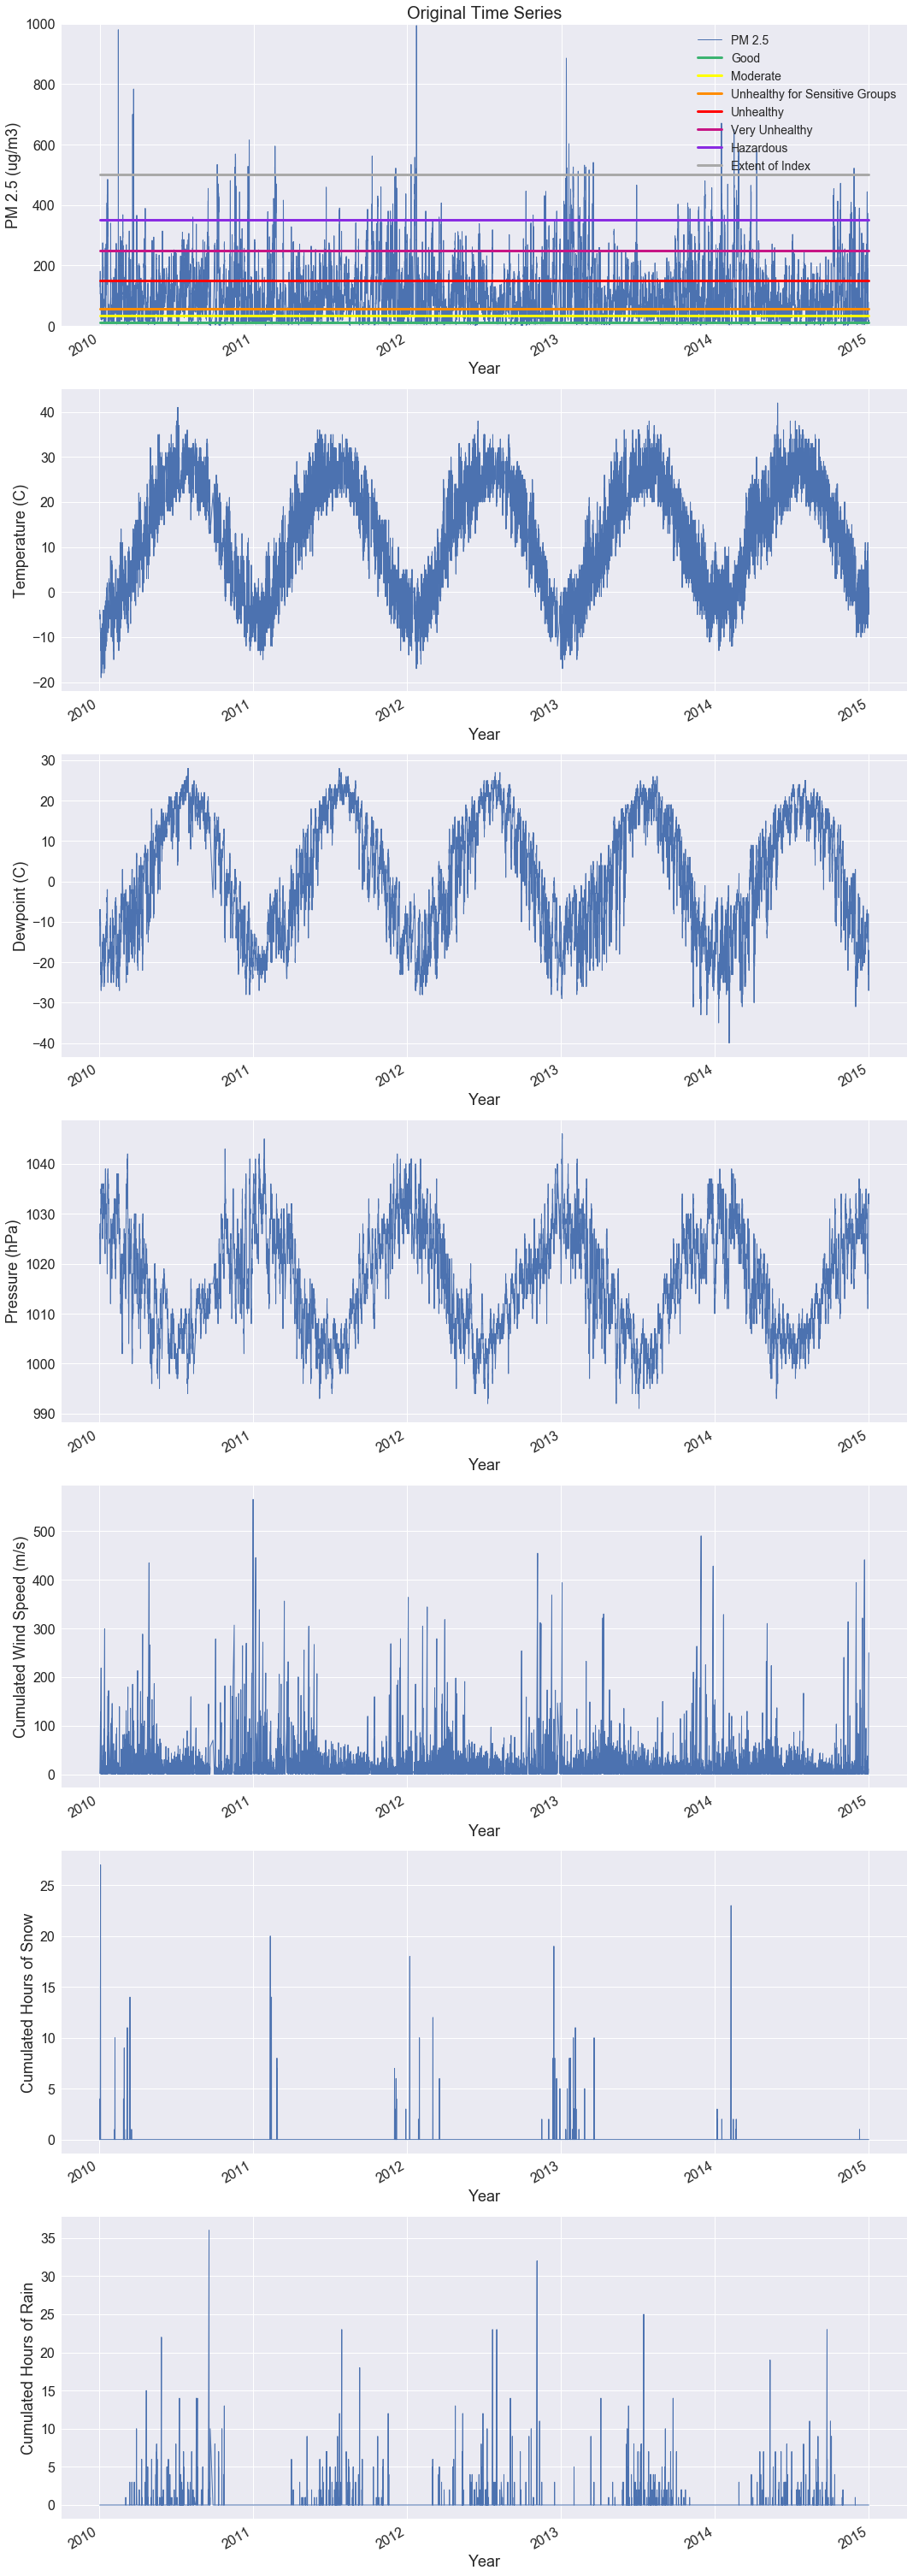

In [4]:
# Let's look at all of the time series
plt.figure(figsize=(15, 42))
plt.subplot(7,1,1)
df['pm25'].plot(linewidth=1, fontsize=16) #'lightslategray') #lightsteelblue
plt.ylabel('PM 2.5 (ug/m3)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.title('Original Time Series', fontsize=20)
plt.ylim([0,1000])
plt.plot(['2010-01-01', '2014-12-31'],['12', '12'], color='mediumseagreen', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['35.4', '35.4'], color='yellow', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['55.4', '55.4'], color='darkorange', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['150.4', '150.4'], color='red', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['250.4', '250.4'], color='mediumvioletred', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['350.4', '350.4'], color='blueviolet', linewidth=3)
plt.plot(['2010-01-01', '2014-12-31'],['500', '500'], color='darkgray', linewidth=3)
plt.legend(['PM 2.5', 'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Extent of Index'], fontsize=14)
# Legend based on updated 2012 EPA PM 2.5 standard

plt.subplot(7,1,2)
df['temp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Temperature (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,3)
df['dewp'].plot(linewidth=1, fontsize=16)
plt.ylabel('Dewpoint (C)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,4)
df['pres'].plot(linewidth=1, fontsize=16)
plt.ylabel('Pressure (hPa)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,5)
df['wind_speed'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Wind Speed (m/s)', fontsize=18)
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,6)
df['snow_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Snow', fontsize=18) 
plt.xlabel('Year', fontsize=18)

plt.subplot(7,1,7)
df['rain_hours'].plot(linewidth=1, fontsize=16)
plt.ylabel('Cumulated Hours of Rain', fontsize=18) 
plt.xlabel('Year', fontsize=18)
plt.tight_layout()

plt.savefig('../figures/original_series.png');

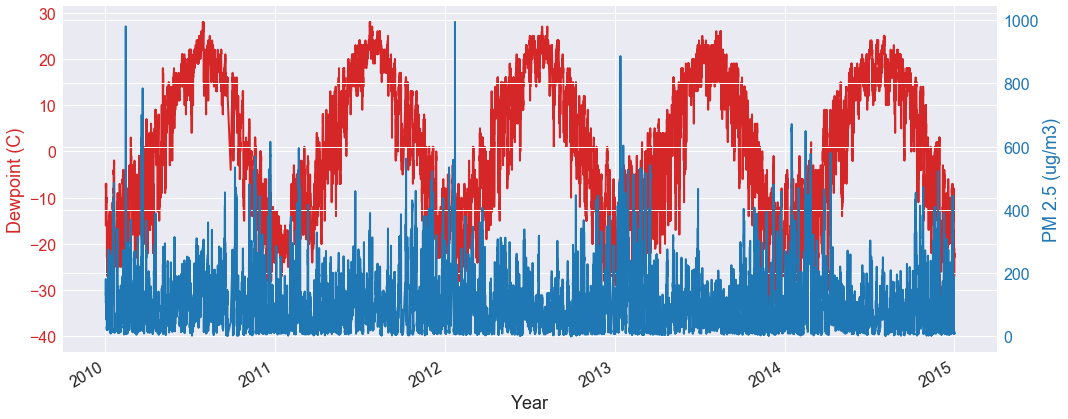

In [5]:
# Look for correlation between pm25 and dewpoint
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['dewp']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Dewpoint (C)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();  

- As expected, `dewpoint` and `pm2.5` appear anti-correlated.
- Both have a pronounced seasonal component.

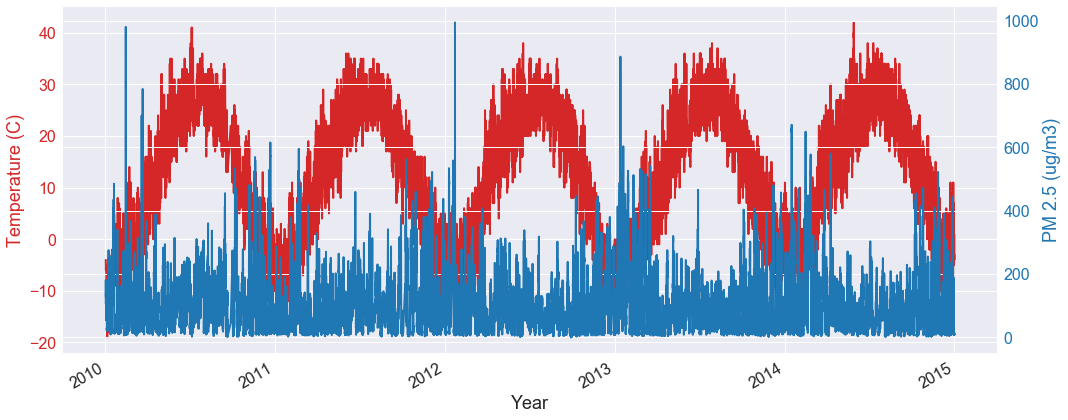

In [6]:
# Look for correlation between pm25 and temperature
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['temp']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Temperature (C)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();  

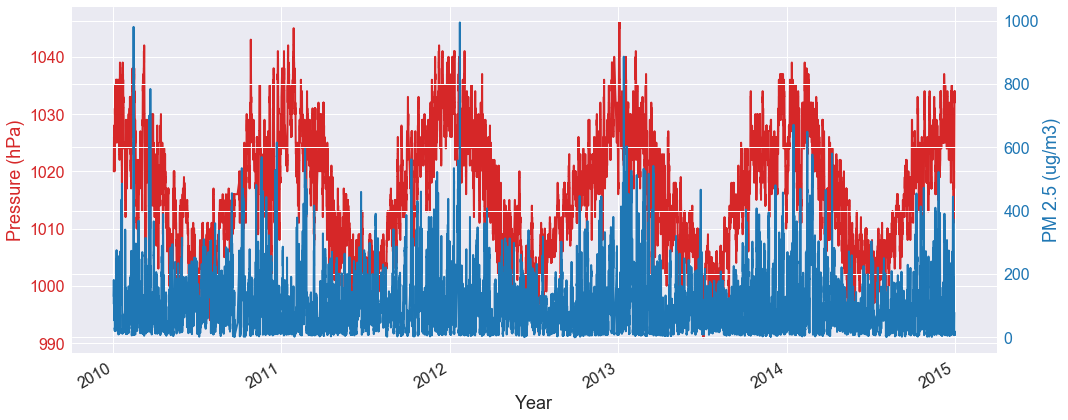

In [7]:
# Look for correlation between pm25 and pressure
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['pres']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Pressure (hPa)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();  

- Surface pressure and PM 2.5 correlate well and have similar seasonality.

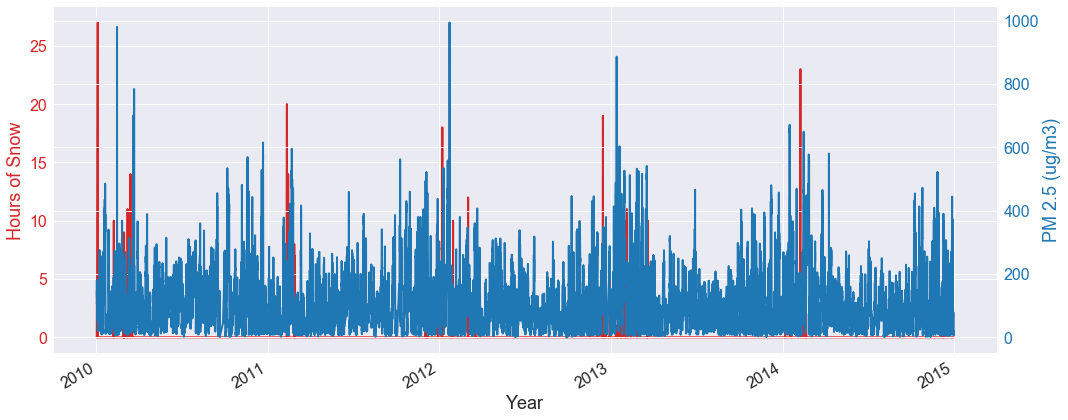

In [8]:
# Look for correlation between pm25 and snow hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['snow_hours']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Hours of Snow', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout();  

- `pm2.5` peaks lag behind snowfall.

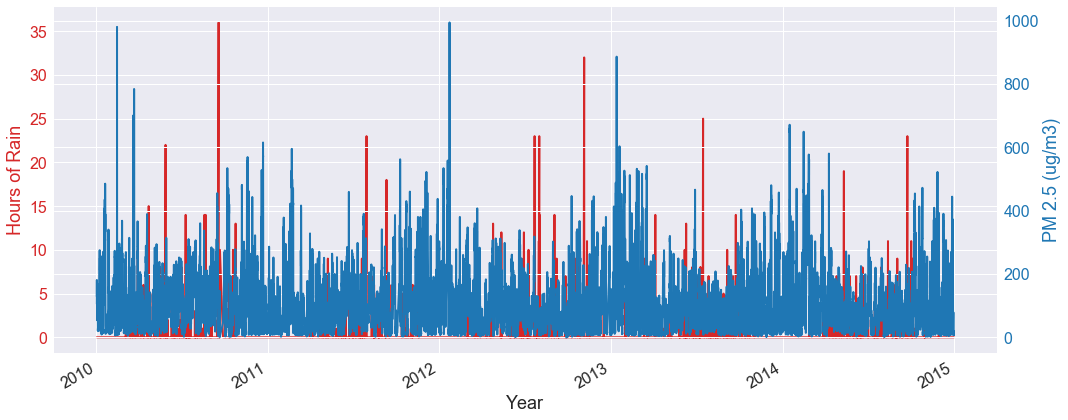

In [9]:
# Look for correlation between pm25 and rain hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['rain_hours']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Hours of Rain', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- `pm2.5` peaks appear anticorelated with rainfall, as expected (rain pulls pm2.5 out of the atmosphere). 

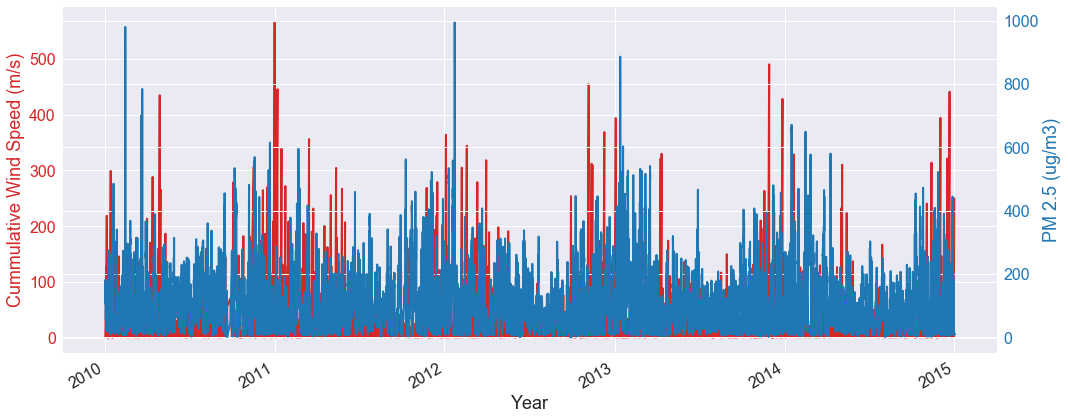

In [10]:
# Look for correlation between pm25 and cummulative wind speed
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['wind_speed']].plot(figsize=(15,6), linewidth=2, fontsize=16, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=18)
ax1.set_ylabel('Cummulative Wind Speed (m/s)', fontsize=18, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(linewidth=2, fontsize=16, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=18, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout(); 

- The seasonality of `pm2.5` and `wind-speed` appear to align nicely. The `pm2.5` peaks appear to slightly lag behind the wind speed peaks. 

In [11]:
# Let's look at the computed correlation coefficients between each time series
df.corr()['pm25']

pm25          1.000000
dewp          0.171423
temp         -0.090534
pres         -0.047282
wind_speed   -0.247784
snow_hours    0.019266
rain_hours   -0.051369
Name: pm25, dtype: float64

The strongest correlations for `pm2.5` are a negative correlation with `wind-speed` (-0.25) and a positive correlation with `dewpoint` (0.17). 

But, these correlation coefficients combine seasonal and trend effects with correlation. Let's look at the correlation coefficients after the trends have been removed.

In [12]:
# What are coefficients once the trends have been removed?
df.diff().corr()['pm25']

pm25          1.000000
dewp          0.152631
temp         -0.072160
pres         -0.018048
wind_speed   -0.028696
snow_hours   -0.003552
rain_hours   -0.015152
Name: pm25, dtype: float64

Once the trends have been removed, we see that `pm25` is most strongly correlated with `dewp` (0.15). The negative correlation between `pm25` and `wind speed` had shrunk significantly. 